# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, derivative, x0, eps=1e-5, maxiter=1000):
    iteration = 0
    x = 2 * eps + x0
    do:
    while True:
        x = x0 - f(x0) / derivative(x0)
        iteration += 1
        if abs(x - x0) <= eps or iteration == maxiter:break
        x0 = x
    
    return x, iteration

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [11]:
function = lambda x: x**2 - 1
derivative = lambda x: 2 * x
x0 = 0.5
x, iteration = newton_iteration(function, derivative, x0, eps=1e-5, maxiter=1000)

print("x = ", x,";", "iteration = ", iteration)

x =  1.000000000000001 ; iteration =  5


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [12]:
def newton_iteration_modify(f, fder, x0, m, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : flooat
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    iteration = 0
    x = x0 + 2 * eps
    points = np.array([])
    
    while True:
        points = np.append(points, x0)
        x = x0 - m * function(x0) / fder(x0)
        iteration += 1
        
        if abs(x - x0) <= eps or iteration == maxiter:
            break
        x0 = x
    
    return x, iteration, points

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

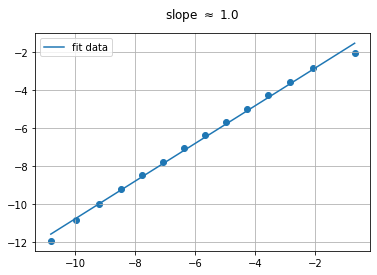

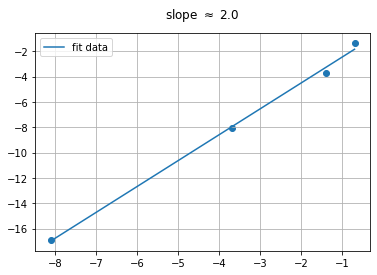

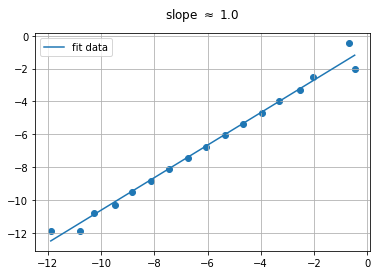

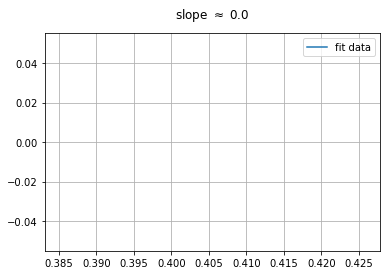

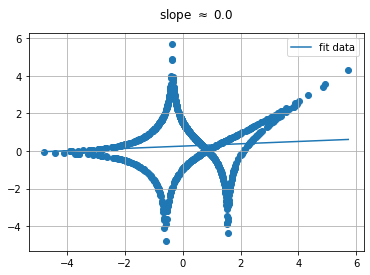

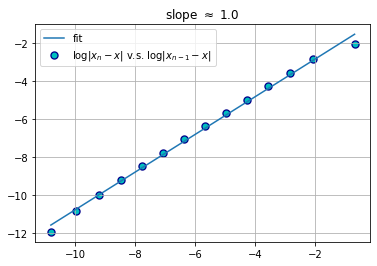

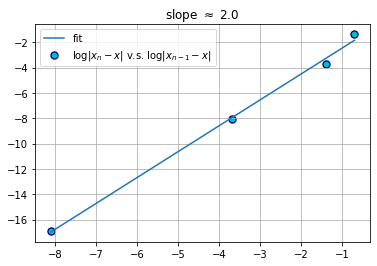

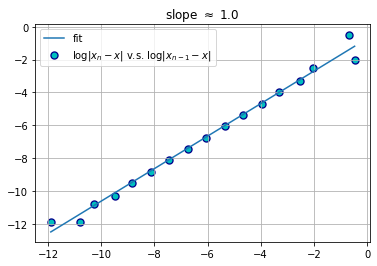

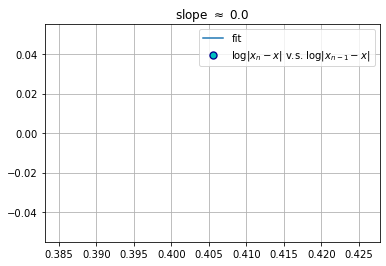

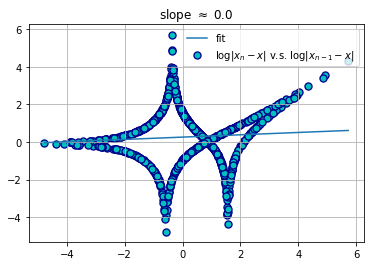

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


function = lambda x :(x**2 - 1)**2
derivative = lambda x: 4 * x * (x**2 - 1)

x0 = 0.5

m_test = [1, 2, 3, 4, 5]

for m in m_test:
    
    x, iteration, points = newton_iteration_modify(function, derivative, x0, m, eps=1e-5, maxiter=1000)

    errors = np.abs(points - x)
    
    y = np.log(errors[1:])
    x = np.log(errors[:-1])
    
    x_opt = np.linspace(np.min(x), np.max(x), 30)
    def f_opt(x_opt, a, b):
        return a * x_opt + b
    def delta(p):
        a, b = p
        return y - f_opt(x, a, b)
    
    from scipy.optimize import leastsq
    a, b = leastsq(delta, (0, 0))[0]
    y_opt = [a * i + b for i in x_opt]
    
    plt.figure()
    plt.title(r'slope $\approx$ %s' % str(round(a)), pad=15)
    plt.scatter(x, y) 
    plt.plot(x_opt, y_opt, label='fit data')
    plt.legend()
    plt.grid()
    plt.show()
    

%matplotlib inline

function = lambda x :(x**2 - 1)**2

derivative = lambda x: 4 * x * (x**2 - 1)

x0 = 0.5

test_data = [1, 2, 3, 4, 5]

for data in test_data:
    
    x, iteration, points = newton_iteration_modify(function, derivative, x0, data, eps=1e-5, maxiter=1000)
    
    errors = np.abs(points - x)
    
    y = np.log(errors[1:])
    x = np.log(errors[:-1])
    
    x_opt = np.linspace(np.min(x), np.max(x), 30)
    def f_opt(x_opt, a, b):
        return a * x_opt + b
    def delta(p):
        a, b = p
        return y - f_opt(x, a, b)
    
    from scipy.optimize import leastsq
    a, b = leastsq(delta, (0, 0))[0]
    y_opt = [a * i + b for i in x_opt]
    
    plt.figure()
    plt.title(r'slope $\approx$ %s' % str(round(a)))
    plt.scatter(x, y, label=r'$\log{|x_n - x|}$ v.s. $\log{|x_{n-1} - x|}$', edgecolors='darkblue',                                                                           color='c',
                                                                             linewidth=1.3,
                                                                             s=50)
    plt.plot(x_opt, y_opt, label='fit')
    plt.legend(prop={'size': 10})
    plt.grid()
    plt.show()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

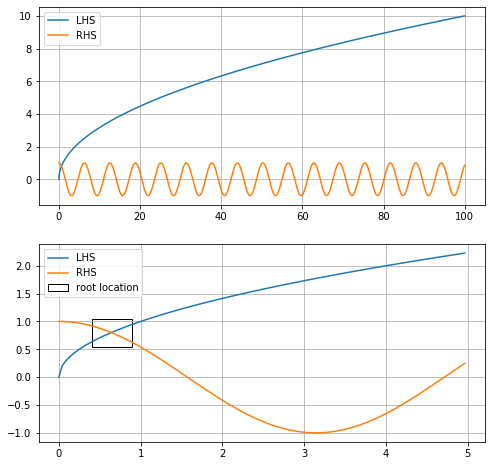

In [26]:
from matplotlib import patches

x = np.linspace(0, 100, 2500)

f = plt.figure(figsize=[8, 8])
ax1 = f.add_subplot(2, 1, 1)
ax2 = f.add_subplot(2, 1, 2)

ax1.plot(x, np.sqrt(x), label='LHS')
ax1.plot(x, np.cos(x), label='RHS')
ax1.legend()
ax1.grid()

ax2.plot(x[0:125], np.sqrt(x[0:125]), label='LHS')
ax2.plot(x[0:125], np.cos(x[0:125]), label='RHS')

pointer = patches.Rectangle((0.4, 0.55), 0.5, 0.5, edgecolor='black', facecolor='none', label='root location')
ax2.add_patch(pointer)
ax2.legend()
ax2.grid()

plt.show()
